In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Q1
gold_colnames=['url', 'category']
df_gold=pd.read_csv('C:/Users/shane/OneDrive/Documents/Data Analytics Programming Summer 2019/Homework/HW3/gold.txt',sep='\t', dtype=unicode,names=gold_colnames,header=None)

labels_colnames=['turk','url', 'category']
df_labels=pd.read_csv('C:/Users/shane/OneDrive/Documents/Data Analytics Programming Summer 2019/Homework/HW3/labels.txt', sep="\t", dtype=unicode,names=labels_colnames,header=None)

In [12]:
#Q2
labels_on_gold=df_gold.merge(df_labels,left_on='url', right_on='url', suffixes=['_gold', '_labels'])
labels_unknown=df_labels[~df_labels['url'].isin(df_gold['url'])]

labels_on_gold[:10]
labels_unknown [:10]

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
5,A2OVKTB7VNY8EW,http://000.cc,G
6,A31Z3E5SLATLML,http://000.cc,P
7,AAVCPZ8WTCFVK,http://000.cc,G
8,AHY98D5P05XIV,http://000.cc,G
9,APTFS1S88K5VC,http://000.cc,G


In [21]:
#Q3
#checks if the ratings match and returns T/F
labels_on_gold['correct rating']=labels_on_gold['category_gold']==labels_on_gold['category_labels']
#if rating is correct then replace with 1
labels_on_gold['correct rating']=labels_on_gold['correct rating'].replace([False, True], [0, 1])
#gives the ratio of correctness for each turk
def ratios(t):
    return t.sum() * 1.0 / t.count()
rater_goodness=labels_on_gold.groupby('turk')[['correct rating']].agg(['count','sum', ratios])
print rater_goodness

               correct rating               
                        count  sum    ratios
turk                                        
A112DVP1KG4QZU              1    1  1.000000
A1253FXHCZ9CWM             29   15  0.517241
A12CY1Q7XKJJDE              1    1  1.000000
A12RE8G66WTO8B             20   15  0.750000
A12Y1GTGIQDGRA              3    1  0.333333
A13CEW9JGDWGX1              1    1  1.000000
A13OE9GBRJ0S2U              4    3  0.750000
A14IQ4GLNWNPOJ              1    1  1.000000
A153PKAL7OAY36            148  107  0.722973
A1554ZM0CLKSG5              1    1  1.000000
A16AZHD3CCD77Q              1    1  1.000000
A17H2HKAZ7KJMQ              2    1  0.500000
A17OE8HU0QCX21              8    7  0.875000
A18HIFA78GUAG9             13    7  0.538462
A18OUQ869740XV              1    1  1.000000
A19KO2JQ36WON3              4    1  0.250000
A19N7GVG3V1FZO              2    1  0.500000
A19Y7K5UEBNZA7              1    0  0.000000
A1AI3MUH2BW1DN              1    0  0.000000
A1C8ZHG3K8

In [30]:
#Q4
def odds(t):
    return (t.sum() * 1.0 / t.count())/(1.001-t.sum() * 1.0 / t.count())
rater_odds=labels_on_gold.groupby('turk')[['correct rating']].agg(['count','sum', ratios, odds])
print rater_odds

               correct rating                            
                        count  sum    ratios         odds
turk                                                     
A112DVP1KG4QZU              1    1  1.000000  1000.000000
A1253FXHCZ9CWM             29   15  0.517241     1.069214
A12CY1Q7XKJJDE              1    1  1.000000  1000.000000
A12RE8G66WTO8B             20   15  0.750000     2.988048
A12Y1GTGIQDGRA              3    1  0.333333     0.499251
A13CEW9JGDWGX1              1    1  1.000000  1000.000000
A13OE9GBRJ0S2U              4    3  0.750000     2.988048
A14IQ4GLNWNPOJ              1    1  1.000000  1000.000000
A153PKAL7OAY36            148  107  0.722973     2.600369
A1554ZM0CLKSG5              1    1  1.000000  1000.000000
A16AZHD3CCD77Q              1    1  1.000000  1000.000000
A17H2HKAZ7KJMQ              2    1  0.500000     0.998004
A17OE8HU0QCX21              8    7  0.875000     6.944444
A18HIFA78GUAG9             13    7  0.538462     1.164144
A18OUQ869740XV

In [39]:
#Q5
rater_odds1=labels_on_gold.groupby('turk')['correct rating'].agg(['count','sum', ratios, odds])
rater_odds1[rater_odds1['count']>=20].sort_values(by='ratios', ascending=False)[:10]


,count,sum,ratios,odds
turk,,,,
A2U0R4X38GUKZE,20,19,0.950000,18.627451
A22C0PJUBFJTI0,36,33,0.916667,10.869565
A23YQUBXZPKILZ,24,21,0.875000,6.944444
ATVALOQVDCMZW,103,88,0.854369,5.826657
A1HIXWH4OXT8S4,40,33,0.825000,4.687500
A3220HG1O83HQ4,22,18,0.818182,4.475385
A32W20KGQXS0LL,25,20,0.800000,3.980100
A20PWAB7G3HDHU,20,16,0.800000,3.980100
AJSJVK40F5HM6,28,22,0.785714,3.649635


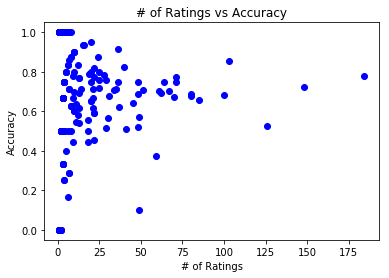

In [43]:
#Q6 
plot(rater_odds1['count'], rater_odds1['ratios'], marker='o', color='blue', linestyle='None')
xlabel('# of Ratings')
ylabel('Accuracy')
title('# of Ratings vs Accuracy')

#No there is no relationship between the # of ratings and the accuracy of the turk

In [ ]:
#Q7
